In [1]:
import sys
import seaborn as sns
import pandas as pd 
import numpy as np
from scipy.spatial.distance import squareform, pdist
import matplotlib.pyplot as plt
import torch
import anndata as an
import scanpy as sc
import os
import gc
from importlib import reload

from datasets import Dataset, load_from_disk
from datasets import load_dataset
from geneformer import EmbExtractor
import geneformer

# local imports
sys.path.insert(0, '../scripts/')
import geneformer_utils as gtu

sns.set_style('white')
torch.cuda.empty_cache()

/home/cstansbu/miniconda3/envs/geneformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load the model

In [2]:
"""Load the model"""
# model_path = "/nfs/turbo/umms-indikar/shared/projects/geneformer/fine_tuned_models/geneformer-6L-30M_CellClassifier_cardiomyopathies_220224/"
model_path = "/nfs/turbo/umms-indikar/shared/projects/geneformer/geneformer-12L-30M/"
model = gtu.load_model(model_path)
print('loaded!')

loaded!


In [3]:
# model

# Load data

In [4]:
dpath = "/scratch/indikar_root/indikar1/shared_data/geneformer/datasets/"

sample_size = 100

df = []

for dataset in os.listdir(dpath):
    
    data_path = f"{dpath}{dataset}"
    tmp = gtu.load_data_as_dataframe(data_path, 
                                     num_cells=sample_size
                                    )
    
    if "iHSC" in dataset:
        tmp['cell_type'] = "iHSC"
    elif "pellin" in dataset:
        tmp['cell_type'] = tmp['dataset']
    elif 'weng' in dataset:
        tmp['cell_type'] = tmp['STD.CellType']
    else:
        tmp['cell_type'] = tmp['free_annotation']
    
    tmp['dataset'] = dataset
    tmp = tmp[['input_ids', 'cell_type', 'dataset', 'length']]
    df.append(tmp)
    
df = pd.concat(df)
data = Dataset.from_pandas(df)
data

Dataset({
    features: ['input_ids', 'cell_type', 'dataset', 'length', '__index_level_0__'],
    num_rows: 1200
})

100%|██████████| 120/120 [00:46<00:00,  2.61it/s]
/home/cstansbu/miniconda3/envs/geneformer/lib/python3.10/site-packages/anndata/_core/anndata.py:767: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


embs.shape=(1200, 512)


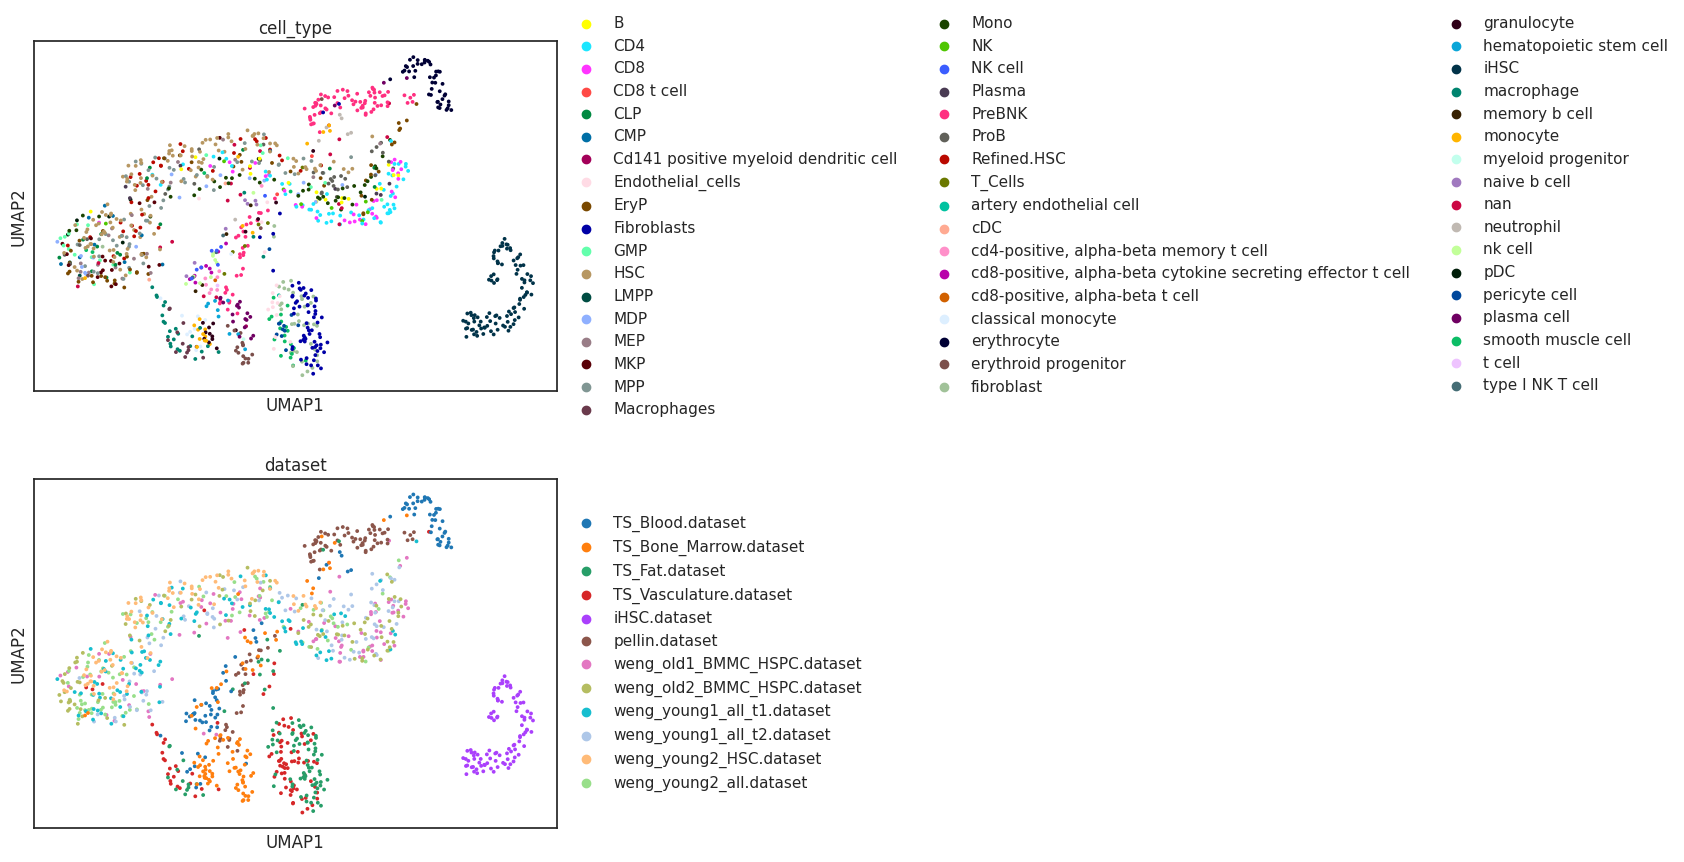

AnnData object with n_obs × n_vars = 1200 × 512
    obs: 'input_ids', 'cell_type', 'dataset', 'length'
    uns: 'pca', 'neighbors', 'umap', 'cell_type_colors', 'dataset_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
reload(gtu)
torch.cuda.empty_cache()
embs = gtu.extract_embedding_in_mem(model, data, layer_to_quant=0)
print(f"{embs.shape=}")

# translate into an anndata object and plot
adata = gtu.embedding_to_adata(embs)
adata.obs = df.copy()

sc.tl.pca(adata, n_comps=25)
sc.pp.neighbors(adata, n_neighbors=200)
sc.tl.umap(adata, 
           min_dist=0.75,
          )

sc.pl.umap(
    adata,
    color=["cell_type", "dataset"],
    ncols=1,
    size=30,
)

adata

# Clean up cell types

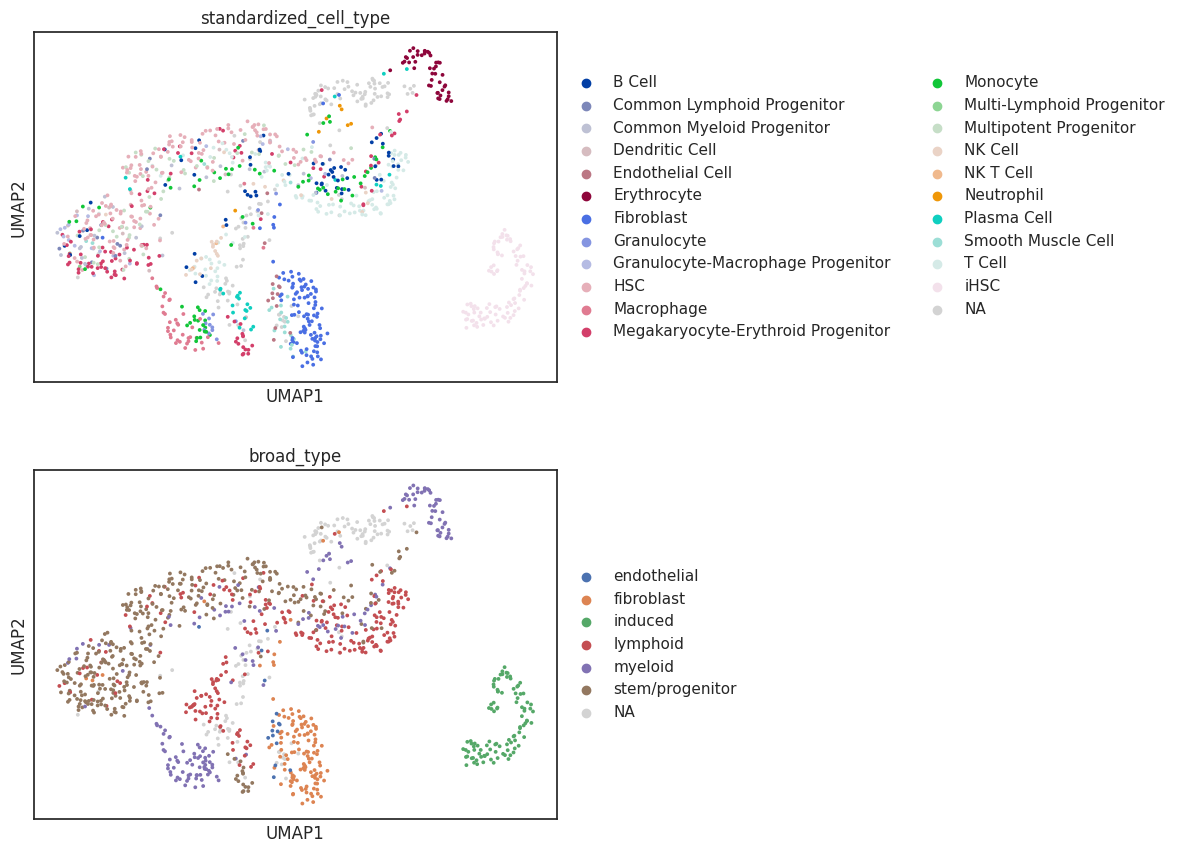

In [6]:
fpath = "ihsc_cell_types.csv"
cell_map = pd.read_csv(fpath, comment="#")

adata.obs = pd.merge(adata.obs, 
                     cell_map,
                     how='left',
                     left_on='cell_type',
                     right_on='label',
                    )

sc.pl.umap(
    adata,
    color=["standardized_cell_type","broad_type"],
    ncols=1,
    size=30,
)

In [7]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
break

In [ ]:
all_genes = []

for input_vec in df['input_ids'].values[0:100]:
    all_genes += list(input_vec)


print(len(set(all_genes)))

In [ ]:
break

In [ ]:
X = embs.to_numpy()
X.shape

In [ ]:
"""Load the data"""
data_path = "/scratch/indikar_root/indikar1/shared_data/geneformer/datasets/TS_Bone_Marrow.dataset"
n_cells = 5000
df = gtu.load_data_as_dataframe(data_path, num_cells=n_cells)
print(f"{df.shape=}")

# convert into arrow dataset
data = Dataset.from_pandas(df)

df.head()

In [ ]:
reload(gtu)
embs = gtu.extract_embedding_in_mem(model, data)
print(f"{embs.shape=}")

# translate into an anndata object and plot
adata = gtu.embedding_to_adata(embs)
adata.obs = df.copy()

sc.tl.pca(adata, n_comps=25)
sc.pp.neighbors(adata, n_neighbors=60)
sc.tl.umap(adata)
sc.pl.umap(
    adata,
    color=["free_annotation", "donor", "gender"],
    ncols=1,
    size=30,
)

adata


In [ ]:
break

In [ ]:
reload(gtu)
torch.cuda.empty_cache()

"""Load the model"""
# model_path = "/nfs/turbo/umms-indikar/shared/projects/geneformer/fine_tuned_models/geneformer-6L-30M_CellClassifier_cardiomyopathies_220224/"
model_path = "/nfs/turbo/umms-indikar/shared/projects/geneformer/geneformer-12L-30M/"
model = gtu.load_model(model_path)

"""Load the data"""
data_path = "/scratch/indikar_root/indikar1/shared_data/geneformer/datasets/iHSC.dataset"
n_cells = 1000
df = gtu.load_data_as_dataframe(data_path)

# convert into arrow dataset
data = Dataset.from_pandas(df)

# useful for later
features = df.columns.to_list()
features.remove("input_ids")

print(f"{df.shape=}")
df.head()

In [ ]:
reload(gtu)
torch.cuda.empty_cache()

"""Load the model"""
# model_path = "/nfs/turbo/umms-indikar/shared/projects/geneformer/fine_tuned_models/geneformer-6L-30M_CellClassifier_cardiomyopathies_220224/"
model_path = "/nfs/turbo/umms-indikar/shared/projects/geneformer/geneformer-12L-30M/"
model = gtu.load_model(model_path)

"""Load the data"""
data_path = "/scratch/indikar_root/indikar1/shared_data/geneformer/datasets/iHSC.dataset"
df = gtu.load_data_as_dataframe(data_path)

# convert into arrow dataset
data = Dataset.from_pandas(df)

# useful for later
features = df.columns.to_list()
features.remove("input_ids")

print(f"{df.shape=}")
df.head()

In [ ]:
reload(gtu)
embs = gtu.extract_embedding_in_mem(model, data)
print(f"{embs.shape=}")
embs.head()

In [ ]:
break

In [ ]:
# translate into an anndata object and plot
adata = gtu.embedding_to_adata(embs)
adata.obs = df.copy()

sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.1)
sc.pl.umap(
    adata,
    # color=["free_annotation", "compartment"],
    ncols=1,
    size=30,
)

adata

In [ ]:
sc.pl.umap(
    adata,
    color=["n_genes_by_counts"],
    ncols=1,
    size=30,
)

In [ ]:
reload(gtu)
torch.cuda.empty_cache()

"""Load the data"""
data_path = "/nfs/turbo/umms-indikar/shared/projects/geneformer/data/tabula_sapiens_skin.dataset"
df = gtu.load_data_as_dataframe(data_path)
df = df[df['free_annotation'] == "skeletal muscle cells"]
print(f"{df.shape=}")
data = Dataset.from_pandas(df)

# gene embedding
gene_embedding = gtu.extract_embedding_in_mem(model, data, emb_mode='gene')
print(f"{gene_embedding.shape=}")

# cell embedding
cell_embedding = gtu.extract_embedding_in_mem(model, data, emb_mode='cell')
print(f"{cell_embedding.shape=}")

# Test cell embedding anf gene embedding

In [ ]:
cell_embedding.to_numpy()[0, 0:3]

In [ ]:
test = gene_embedding.mean(axis=1)
test[0, 0:3]

In [ ]:
break